In [1]:
# %matplotlib widget
import numpy as np
import pandas as pd
import cv2 as cv
from pathlib import Path
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

img_exts = ['png', 'jpg', 'bmp']

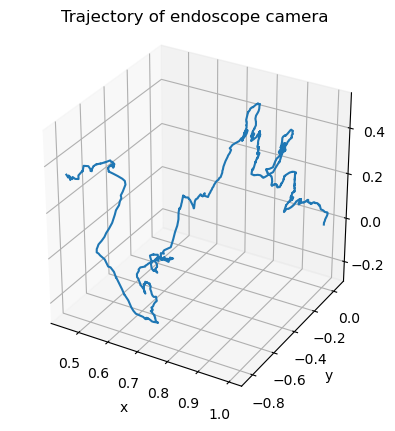

In [3]:
poses = np.loadtxt(
    '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/endoslam-pose-out/09.txt',
)
X = poses[:,0]
Y = poses[:,1]
Z = poses[:,2]

ax = plt.figure().add_subplot(projection='3d')
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Trajectory of endoscope camera')
ax.plot(X, Y, Z)
plt.show()

## Demo Code

In [2]:
image_dir = Path(
    '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/EndoSLAM-dataset/HighCam/Stomach-I/TumorfreeTrajectory_1/Frames/'
)
img_list = sorted(
    sum([list(image_dir.glob(f'*.{ext}')) for ext in img_exts], [])
)
len(img_list)

1092

In [4]:
poses = np.loadtxt(
    '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/endoslam-pose-out/09.txt',
)
X = poses[:,0]
Y = poses[:,1]
Z = poses[:,2]
depth_predictions = np.load(
    '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/endoslam-disp-out/predictions.npy'
)

vid_path_out = '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/endoslam-pose-out/09.mp4'
vid_path_out2 = '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/endoslam-pose-out/09_endo.mp4'
fourcc = cv.VideoWriter_fourcc(*'MJPG')
for k, image_fname in tqdm(enumerate(img_list)):
    x = X[:k+1]
    y = Y[:k+1]
    z = Z[:k+1]
    img = plt.imread(image_fname)

    fig, axs = plt.subplot_mosaic(
        [
            ['frame', 'frame', '3d'],
            ['frame', 'frame', 'depth']
        ], layout='constrained'
    )
    axs['frame'].set_axis_off()
    axs['frame'].set_title(image_fname.stem)
    axs['frame'].imshow(img)
    axs['3d'] = plt.subplot(2, 3, 3, projection='3d')
    axs['3d'].set_aspect('equal')
    axs['3d'].set_xlabel('x', labelpad=1)
    axs['3d'].set_ylabel('y', labelpad=1)
    axs['3d'].set_zlabel('z', labelpad=1)
    axs['3d'].set_xlim(X.min(), X.max())
    axs['3d'].set_ylim(Y.min(), Y.max())
    axs['3d'].set_zlim(Z.min(), Z.max())
    axs['3d'].set_title('Trajectory of\nendoscope camera')
    axs['3d'].plot(x,y,z)
    axs['depth'].set_axis_off()
    axs['depth'].set_title(f'depth heatmap {k}')
    axs['depth'].imshow(
        depth_predictions[k,:,:],
        vmin=depth_predictions.min(),
        vmax=depth_predictions.max()
    )
    fig.set_frameon(False)
    fig.set_tight_layout(True)
    plt.close()
    fig.canvas.draw()
    frame = np.array(fig.canvas.renderer._renderer)
    if k == 0:
        shapey, shapex = frame.shape[:2]
        shapey2, shapex2 = img.shape[:2]
        out = cv.VideoWriter(vid_path_out, fourcc, 20, (shapex, shapey))
        out_endoscope = cv.VideoWriter(vid_path_out2, fourcc, 20, (shapex2, shapey2))
        print(frame.shape, img.shape)
    out.write(cv.cvtColor(frame, cv.COLOR_RGBA2RGB))
    out_endoscope.write(img)
else:
    out.release()
    out_endoscope.release()
    print('DONE!')

0it [00:00, ?it/s]

/var/folders/87/fqj14sld0glb6bvx98qj62gm0000gn/T/ipykernel_63601/569373610.py:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axs['3d'] = plt.subplot(2, 3, 3, projection='3d')
OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


(480, 640, 4) (480, 640, 3)
DONE!


## Plotting ground truth

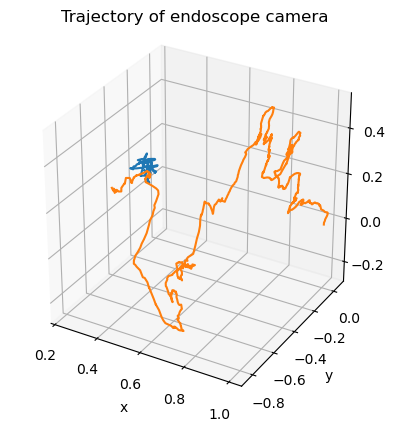

In [7]:
pose_gt = pd.read_excel(
    '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/EndoSLAM-dataset/HighCam/Stomach-I/TumorfreeTrajectory_1/Poses/low_high_pose_stom1_teste1_high_images.xlsx',
    index_col=0
)
ax = plt.figure().add_subplot(projection='3d')
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Trajectory of endoscope camera')
ax.plot(pose_gt.trans_x, pose_gt.trans_y, pose_gt.trans_z)
ax.plot(X, Y, Z)
plt.show()

In [44]:
pose_gt = pd.read_excel(
    '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/EndoSLAM-dataset/LowCam/Stomach-I/TumorfreeTrajectory_3/Poses/low_high_pose_stom1_teste3_low_images.xlsx',
    index_col=0
)
Xgt = pose_gt.trans_x
Ygt = pose_gt.trans_y
Zgt = pose_gt.trans_z

image_dir = Path(
    '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/EndoSLAM-dataset/LowCam/Stomach-I/TumorfreeTrajectory_3/Frames/'
)
img_list = sorted(
    sum([list(image_dir.glob(f'*.{ext}')) for ext in img_exts], [])
)

vid_path_out = '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/endoslam-pose-out/LowCam-Stomach-I-TumorfreeTrajectory_3.mp4'
fourcc = cv.VideoWriter_fourcc(*'MJPG')
for k, image_fname in tqdm(enumerate(img_list)):
    x = Xgt[:k+1]
    y = Ygt[:k+1]
    z = Zgt[:k+1]
    img = plt.imread(image_fname)

    fig = plt.figure()
    ax = fig.add_subplot(1, 2, 1)
    ax.set_axis_off()
    ax.set_title(image_fname.stem)
    ax.imshow(img)
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_aspect('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(Xgt.min(), Xgt.max())
    ax.set_ylim(Ygt.min(), Ygt.max())
    ax.set_zlim(Zgt.min(), Zgt.max())
    ax.set_title('Trajectory of endoscope camera')
    ax.plot(x,y,z)
    fig.set_frameon(False)
    fig.set_tight_layout(True)
    plt.close()
    fig.canvas.draw()
    frame = np.array(fig.canvas.renderer._renderer)
    if k == 0:
        shapey, shapex = frame.shape[:2]
        shapey2, shapex2 = img.shape[:2]
        out = cv.VideoWriter(vid_path_out, fourcc, 20, (shapex, shapey))
    out.write(cv.cvtColor(frame, cv.COLOR_RGBA2RGB))
else:
    out.release()
    print('DONE!')

0it [00:00, ?it/s]

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


DONE!


## Test on in-house dataset

In [22]:
pose_nuh = np.loadtxt(
    '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/endoslam-pose-out-inhouse/16Feb2023-00040024 Trim 04_52 to 7_45.txt'
    # '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/endoslam-pose-out-inhouse/13Feb2023-00040023 Trim 11_25 to 18_50.txt'
    # '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/endoslam-pose-out-inhouse/10Nov2022-0004001V Trim 07_40.txt'
)
err = []
l1 = pose_nuh[470,:3]
r1 = pose_nuh[2300,:3]
err += [np.linalg.norm(r1 - l1)]
l2 = pose_nuh[835,:3]
r2 = pose_nuh[2455,:3]
err += [np.linalg.norm(r2 - l2)]
l3 = pose_nuh[1250,:3]
r3 = pose_nuh[3265,:3]
err += [np.linalg.norm(r3 - l3)]
err, np.array(err).mean()

([0.529155442928184, 0.2834129627769577, 0.9127721503506583],
 0.5751135186852666)

In [21]:
pose_nuh = np.loadtxt(
    '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/endoslam-pose-out-inhouse/16Feb2023-00040024 Trim 04_52 to 7_45.txt'
    # '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/endoslam-pose-out-inhouse/13Feb2023-00040023 Trim 11_25 to 18_50.txt'
    # '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/endoslam-pose-out-inhouse/10Nov2022-0004001V Trim 07_40.txt'
)
Xin = pose_nuh[:,0]
Yin = pose_nuh[:,1]
Zin = pose_nuh[:,2]

image_dir = Path(
    '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/cropped_poolx/16Feb2023-00040024 Trim 04_52 to 7_45/'
    # '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/cropped_poolx/13Feb2023-00040023 Trim 11_25 to 18_50/'
    # '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/cropped_poolx/10Nov2022-0004001V Trim 07_40/'
)
img_list = sorted(
    sum([list(image_dir.glob(f'*.{ext}')) for ext in img_exts], []),
    key=lambda p: int(p.stem[5:])
)

vid_path_out = Path(
    '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/endoslam-pose-out-inhouse'
)/(f'{image_dir.name}.mp4')
fourcc = cv.VideoWriter_fourcc(*'MJPG')
for k, image_fname in tqdm(enumerate(img_list)):
    x = Xin[:k+1]
    y = Yin[:k+1]
    z = Zin[:k+1]
    img = plt.imread(image_fname)

    fig = plt.figure()
    ax = fig.add_subplot(1, 2, 1)
    ax.set_axis_off()
    ax.set_title(image_fname.stem)
    ax.imshow(img)
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_aspect('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(Xin.min(), Xin.max())
    ax.set_ylim(Yin.min(), Yin.max())
    ax.set_zlim(Zin.min(), Zin.max())
    ax.set_title('Trajectory of endoscope camera')
    ax.plot(x,y,z)
    # if k in list(range(500, 520))+list(range(2550, 2570))+list(range(2910, 2930)):
    #     ax.scatter(
    #         Xin[k], Yin[k], Zin[k],
    #         s=plt.rcParams['lines.markersize']**4,
    #         c='g'
    #     )
    l1start = 460
    l1end = l1start + 20
    if k in range(l1start, l1end):
        ax.scatter(
            Xin[l1start:k], Yin[l1start:k], Zin[l1start:k],
            # s=plt.rcParams['lines.markersize']**2,
            c='g'
        )
    elif k>=l1end:
        ax.scatter(
            Xin[l1start:l1end], Yin[l1start:l1end], Zin[l1start:l1end],
            # s=plt.rcParams['lines.markersize']**2,
            c='g'
        )
    l2start = 825
    l2end = l2start + 20
    if k in range(l2start, l2end):
        ax.scatter(
            Xin[l2start:k], Yin[l2start:k], Zin[l2start:k],
            # s=plt.rcParams['lines.markersize']**2,
            c='g'
        )
    elif k>=l2end:
        ax.scatter(
            Xin[l2start:l2end], Yin[l2start:l2end], Zin[l2start:l2end],
            # s=plt.rcParams['lines.markersize']**2,
            c='g'
        )
    l3start = 1240
    l3end = l3start + 20
    if k in range(l3start, l3end):
        ax.scatter(
            Xin[l3start:k], Yin[l3start:k], Zin[l3start:k],
            # s=plt.rcParams['lines.markersize']**2,
            c='g'
        )
    elif k>=l3end:
        ax.scatter(
            Xin[l3start:l3end], Yin[l3start:l3end], Zin[l3start:l3end],
            # s=plt.rcParams['lines.markersize']**2,
            c='g'
        )
    r1start = 2295
    r1end = r1start + 10
    if k in range(r1start, r1end):
        ax.scatter(
            Xin[r1start:k], Yin[r1start:k], Zin[r1start:k],
            # s=plt.rcParams['lines.markersize']**2,
            c='r'
        )
    elif k>=r1end:
        ax.scatter(
            Xin[r1start:r1end], Yin[r1start:r1end], Zin[r1start:r1end],
            # s=plt.rcParams['lines.markersize']**2,
            c='r'
        )
    r2start = 2450
    r2end = r2start + 10
    if k in range(r2start, r2end):
        ax.scatter(
            Xin[r2start:k], Yin[r2start:k], Zin[r2start:k],
            # s=plt.rcParams['lines.markersize']**2,
            c='r'
        )
    elif k>=r2end:
        ax.scatter(
            Xin[r2start:r2end], Yin[r2start:r2end], Zin[r2start:r2end],
            # s=plt.rcParams['lines.markersize']**2,
            c='r'
        )
    r3start = 3260
    r3end = r3start + 10
    if k in range(r3start, r3end):
        ax.scatter(
            Xin[r3start:k], Yin[r3start:k], Zin[r3start:k],
            # s=plt.rcParams['lines.markersize']**2,
            c='r'
        )
    elif k>=r3end:
        ax.scatter(
            Xin[r3start:r3end], Yin[r3start:r3end], Zin[r3start:r3end],
            # s=plt.rcParams['lines.markersize']**2,
            c='r'
        )
    r4start = 4250
    r4end = r4start + 10
    if k in range(r4start, r4end):
        ax.scatter(
            Xin[r4start:k], Yin[r4start:k], Zin[r4start:k],
            # s=plt.rcParams['lines.markersize']**2,
            c='r'
        )
    elif k>=r4end:
        ax.scatter(
            Xin[r4start:r4end], Yin[r4start:r4end], Zin[r4start:r4end],
            # s=plt.rcParams['lines.markersize']**2,
            c='r'
        )
    # r5start = 6911
    # r5end = r5start + 10
    # if k in range(r5start, r5end):
    #     ax.scatter(
    #         Xin[r5start:k], Yin[r5start:k], Zin[r5start:k],
    #         # s=plt.rcParams['lines.markersize']**2,
    #         c='r'
    #     )
    # elif k>=r5end:
    #     ax.scatter(
    #         Xin[r5start:r5end], Yin[r5start:r5end], Zin[r5start:r5end],
    #         # s=plt.rcParams['lines.markersize']**2,
    #         c='r'
    #     )
    # r6start = 8275
    # r6end = r6start + 10
    # if k in range(r6start, r6end):
    #     ax.scatter(
    #         Xin[r6start:k], Yin[r6start:k], Zin[r6start:k],
    #         # s=plt.rcParams['lines.markersize']**2,
    #         c='r'
    #     )
    # elif k>=r6end:
    #     ax.scatter(
    #         Xin[r6start:r6end], Yin[r6start:r6end], Zin[r6start:r6end],
    #         # s=plt.rcParams['lines.markersize']**2,
    #         c='r'
    #     )
    fig.set_frameon(False)
    fig.set_tight_layout(True)
    plt.close()
    fig.canvas.draw()
    frame = np.array(fig.canvas.renderer._renderer)
    if k == 0:
        shapey, shapex = frame.shape[:2]
        print('video size', shapex, shapey)
        out = cv.VideoWriter(vid_path_out.as_posix(), fourcc, 20, (shapex, shapey))
    out.write(cv.cvtColor(frame, cv.COLOR_BGRA2RGB))
else:
    out.release()
    print(f'Exported results at {vid_path_out}')

0it [00:00, ?it/s]

video size 640 480


OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Exported results at /Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/endoslam-pose-out-inhouse/16Feb2023-00040024 Trim 04_52 to 7_45.mp4


## Tool detection

In [18]:
import torch
from segment_anything import sam_model_registry, SamPredictor

device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
print(f'~~~Using {device}~~~')

sam_checkpoint = '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/endoslam-pose-out-inhouse/sam_vit_h_4b8939.pth'
model_type = 'vit_h'

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

~~~Using mps~~~


In [47]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

def add_mask(image, mask):
    return np.expand_dims(
        1 - mask, -1
    )*image + cv.addWeighted(
        np.expand_dims(mask, -1)*image,
        .5,
        (
            np.expand_dims(mask, -1)*np.array([30, 144, 255]).reshape(1, 1, -1)
        ).astype(np.uint8),
        .5,
        0
    )

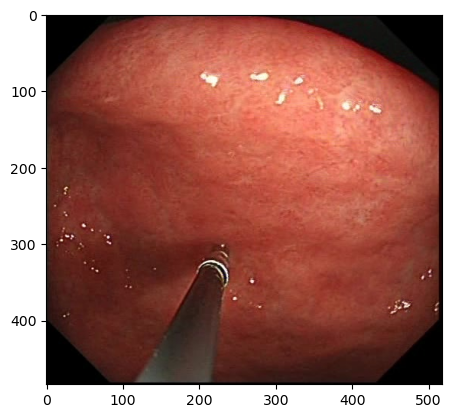

(484, 518, 3)

In [17]:
image = cv.imread(
    '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/cropped_poolx/13Feb2023-00040023 Trim 11_25 to 18_50/frame310.jpg',
    cv.IMREAD_UNCHANGED
)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()
image.shape

/Users/chanwayng/miniconda/envs/endoslam/lib/python3.11/site-packages/segment_anything/modeling/mask_decoder.py:126: UserWarning: MPS: no support for int64 repeats mask, casting it to int32 (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/Repeat.mm:236.)
  src = torch.repeat_interleave(image_embeddings, tokens.shape[0], dim=0)


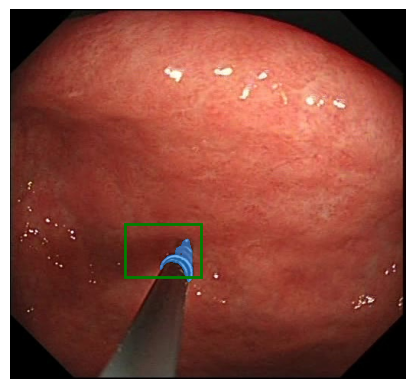

In [20]:
input_box = np.array([150,280,250,350])
predictor.set_image(image)
masks, scores, logits = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False
)
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')
plt.show()

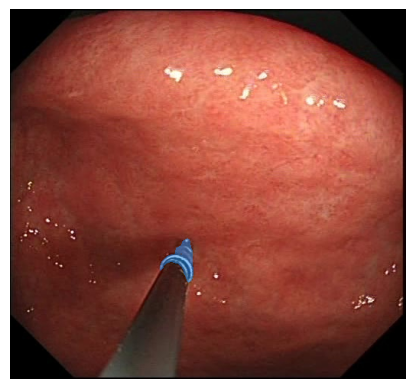

In [71]:
plt.imshow(
    add_mask(image, masks.squeeze())
)
y, x = regionprops(label(masks.squeeze()), image)[0].centroid
# plt.scatter(x, y, color='green', marker='*', s=375, edgecolor='white', linewidth=1.25)
plt.axis('off')
plt.show()

In [58]:
from skimage.measure import regionprops, label
props = regionprops(
    label(masks.squeeze())
)[0].centroid

(326.9534671532847, 224.85766423357666)

## Stitching

In [77]:
stitcher = cv.Stitcher_create()
images = []
for image_fname in tqdm(img_list):
    images.append(cv.imread(image_fname.as_posix()))
status, stitched = stitcher.stitch(images)
if not status:
    plt.imshow(stitched)
else:
    print(status)

  0%|          | 0/5560 [00:00<?, ?it/s]

KeyboardInterrupt: 

: 

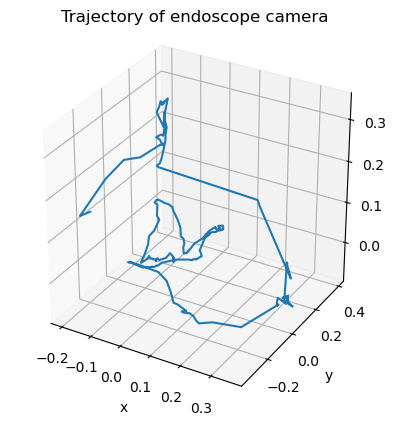

In [3]:
poses = np.loadtxt(
    '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/endoslam-vid/HighCamStomachITumorfreeTrajectory1.txt',
)
X = poses[:,1]
Y = poses[:,2]
Z = poses[:,3]
ax = plt.figure().add_subplot(projection='3d')
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Trajectory of endoscope camera')
ax.plot(X, Y, Z)
plt.show()

In [7]:
poses = np.loadtxt(
    '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/endoslam-vid/HighCamStomachITumorfreeTrajectory1.txt',
)
Xin = poses[:,1]
Yin = poses[:,2]
Zin = poses[:,3]
img_exts = ['png', 'jpg', 'bmp']
image_dir = Path(
    '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/EndoSLAM-dataset/HighCam/Stomach-I/TumorfreeTrajectory_1/Frames/'
)
img_list = sorted(
    sum([list(image_dir.glob(f'*.{ext}')) for ext in img_exts], [])
)

vid_path_out = '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/endoslam-vid/HighCamStomachITumorfreeTrajectory1-1.mp4'
fourcc = cv.VideoWriter_fourcc(*'MJPG')
for k, image_fname in tqdm(enumerate(img_list)):
    x = Xin[:k//5+1]
    y = Yin[:k//5+1]
    z = Zin[:k//5+1]
    img = plt.imread(image_fname)

    fig = plt.figure()
    ax = fig.add_subplot(1, 2, 1)
    ax.set_axis_off()
    ax.set_title(image_fname.stem)
    ax.imshow(img)
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_aspect('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(Xin.min(), Xin.max())
    ax.set_ylim(Yin.min(), Yin.max())
    ax.set_zlim(Zin.min(), Zin.max())
    ax.set_title('Trajectory of endoscope camera')
    ax.plot(x,y,z)
    fig.set_frameon(False)
    fig.set_tight_layout(True)
    plt.close()
    fig.canvas.draw()
    frame = np.array(fig.canvas.renderer._renderer)
    if k == 0:
        shapey, shapex = frame.shape[:2]
        shapey2, shapex2 = img.shape[:2]
        out = cv.VideoWriter(vid_path_out, fourcc, 20, (shapex, shapey))
    out.write(cv.cvtColor(frame, cv.COLOR_BGRA2RGB))
else:
    out.release()
    print('DONE!')

0it [00:00, ?it/s]

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


DONE!


In [3]:
fourcc = cv.VideoWriter_fourcc(*'MJPG')
img_exts = ['png', 'jpg', 'bmp']
vid_path_out = Path('/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/endoslam-vid/')
pose_paths = Path(
    '/Users/chanwayng/Library/CloudStorage/OneDrive-ENDOFOTONICSPTELTD/EndoSLAM-dataset/HighCam/'
).rglob('Stomach*/*/*/*.xlsx')
for p in sorted(list(pose_paths)):
    pose = pd.read_excel(p, index_col=0)
    X = pose.trans_x
    Y = pose.trans_y
    Z = pose.trans_z
    
    img_list = sorted(
        sum([list(p.parent.parent.rglob(f'*.{ext}')) for ext in img_exts], [])
    )
    for k, image_fname in tqdm(enumerate(img_list)):
        x = X[:k+1]
        y = Y[:k+1]
        z = Z[:k+1]
        img = plt.imread(image_fname)

        fig = plt.figure()
        ax = fig.add_subplot(1, 2, 1)
        ax.set_axis_off()
        ax.set_title(image_fname.stem)
        ax.imshow(img)
        ax = fig.add_subplot(1, 2, 2, projection='3d')
        ax.set_aspect('equal')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_xlim(X.min(), X.max())
        ax.set_ylim(Y.min(), Y.max())
        ax.set_zlim(Z.min(), Z.max())
        ax.set_title('Trajectory of endoscope camera')
        ax.plot(x,y,z)
        fig.set_frameon(False)
        fig.set_tight_layout(True)
        plt.close()
        fig.canvas.draw()
        frame = np.array(fig.canvas.renderer._renderer)
        if k == 0:
            shapey, shapex = frame.shape[:2]
            # shapey2, shapex2 = img.shape[:2]
            out = cv.VideoWriter(
                (vid_path_out/f'{p.stem}2.mp4').as_posix(),
                fourcc,
                20,
                (shapex, shapey)
            )
        out.write(cv.cvtColor(frame, cv.COLOR_BGRA2RGB))
    else:
        out.release()
        print(f'DONE {p.name} {k} {pose.shape}')

0it [00:00, ?it/s]

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


DONE low_high_pose_stom1_teste1_high_images.xlsx 1091 (1094, 9)


0it [00:00, ?it/s]

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


DONE low_high_pose_stom1_teste2_high_images.xlsx 1660 (1661, 9)


0it [00:00, ?it/s]

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


DONE low_high_pose_stom1_teste3_high_images.xlsx 1348 (1349, 9)


0it [00:00, ?it/s]

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


DONE low_high_pose_stom1_teste4_high_images.xlsx 594 (595, 9)


0it [00:00, ?it/s]

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


DONE low_high_pose_stom2_teste1_high_images.xlsx 1014 (1015, 9)


0it [00:00, ?it/s]

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


DONE low_high_pose_stom2_teste2_high_images.xlsx 26 (27, 9)


0it [00:00, ?it/s]

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


DONE low_high_pose_stom2_teste3_high_images.xlsx 1281 (1282, 9)


0it [00:00, ?it/s]

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


DONE low_high_pose_stom2_teste4_high_images.xlsx 981 (982, 9)


0it [00:00, ?it/s]

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


DONE low_high_pose_stom3_teste1_high_images.xlsx 916 (917, 9)


0it [00:00, ?it/s]

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


DONE low_high_pose_stom3_teste2_high_images.xlsx 790 (791, 9)


0it [00:00, ?it/s]

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


DONE low_high_pose_stom3_teste3_high_images.xlsx 748 (749, 9)


0it [00:00, ?it/s]

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


DONE low_high_pose_stom3_teste4_high_images.xlsx 776 (777, 9)
